# 리눅스에서 파일 다운받기

#데이터준비하기
$ mkdir -p ~/aiffel/pokemon_eda/data
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/Pokemon.csv
$ unzip pokemon.zip
$ ls
$ mv Pokemon.csv ~/aiffel/pokemon_eda/data


    1.다양한 피쳐가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피쳐에는 무엇이 있는지 생각해본다.
    2.모델 학습을 시작하기 전 모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하며 다양한 방법으로 충분한 EDA를 진행한다.
    3.모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩 등으로 적절하게 진행한다.
    4.전체 데이터셋을 train/test 데이터셋으로 나누고, 적절한 분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교해본다.


 탐색적 데이터 분석(Exploratory Data Analysis, 이하 EDA) 

In [50]:
##라이브러리 가져오기
import numpy as np   ##표데이터다루기 위해
import pandas as pd  ##표데해터다루기위해
import seaborn as sns   ##그래프 시각화
import matplotlib.pyplot as plt   ##그래프시각화
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [51]:
##os에서 불러오기
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [52]:
original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [53]:
##표로 시각화
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [54]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [55]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [56]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [57]:
##결측치 확인  = type 2에만 결측치(데이터 없음)
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [58]:
#데이터셋의 전체컬럼
print(len(pokemon.columns)) #칼럼의 갯수
pokemon.columns #칼럼의 이름들

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [59]:
# #칼럼에 해당하는 데이터
# 컬럼을 집합으로 만든 자료 // 전체데이터보다 작은 이유는
# 중복데이터때문 = unique하지않다 = index로 쓸 수 없다
len(set(pokemon["#"]))
print(set(pokemon["#"]))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [60]:
# #칼럼이 6인 값을 출력
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [61]:
#칼럼이 name인 데이터의 길이 = 총 데이터의 길이
len(set(pokemon["Name"]))
print(set(pokemon["Name"]))

{'Bulbasaur', 'Cherubi', 'Yamask', 'Stoutland', 'Steelix', 'Dewgong', 'Durant', 'Zygarde50% Forme', 'BanetteMega Banette', 'Snubbull', 'Relicanth', 'Armaldo', 'Magmar', 'Timburr', 'Cloyster', 'ShayminSky Forme', 'Frogadier', 'Bellossom', 'Skrelp', 'Mantyke', 'Eelektross', 'KyogrePrimal Kyogre', 'Froakie', 'Bronzong', 'ThundurusTherian Forme', 'GourgeistLarge Size', 'Gliscor', 'Sealeo', 'Watchog', 'Tauros', 'Doduo', 'Girafarig', 'Shiftry', 'Whismur', 'Archeops', 'Floatzel', 'Cobalion', 'Blaziken', 'Phantump', 'Pichu', 'Ambipom', 'PumpkabooSmall Size', 'Sandile', 'Unfezant', 'Vibrava', 'Slurpuff', 'PumpkabooLarge Size', 'Sneasel', 'Emolga', 'Magcargo', 'Squirtle', 'Makuhita', 'Deino', 'Honedge', 'Marill', 'Lickilicky', 'Nidorino', 'Wartortle', 'Combee', 'SceptileMega Sceptile', 'Talonflame', 'Magnemite', 'Grotle', 'Sylveon', 'Kricketot', 'Munna', 'Elekid', 'Azelf', 'Haxorus', 'Empoleon', 'Weavile', 'Vanillish', 'Budew', 'Sudowoodo', 'Beldum', 'Torchic', 'Dedenne', 'Lairon', 'Venipede', '

In [62]:
# 6번째, 10 번째 값들 출력
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [63]:
# 각 속성의 종류(type 1 칼럼, type2 칼럼의 갯수
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [64]:
# 차집합구하기 type2에만 있는 거
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [65]:
#type1타입을 type에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ghost', 'Normal', 'Electric', 'Grass', 'Fire', 'Ground', 'Psychic', 'Flying', 'Dragon', 'Dark', 'Poison', 'Fairy', 'Fighting', 'Steel', 'Rock', 'Bug', 'Water', 'Ice']


In [66]:
# 판다스의 isna()함수
# false / true로 반환
pokemon["Type 2"].isna()

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

In [67]:
pokemon.head(20)
#isna() 결과와 봤을때 index4-type2와 보기
#nan이 true로 발생

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [68]:
# 판다스의 isna()함수
# false / true로 반환
pokemon["Type 2"].isna().sum()

386

In [69]:
# head 10미만까지의 isna(T/F로 치환)한 것들의 합 = FALSE의 합(Nan 등) // FALSE는 1 true는 0
pokemon.head(10)["Type 2"].isna().sum()

3

In [73]:
pokemon["Type 2"].notna().sum()
#isna와 반대
# 값이 있으면 true / 값이 na면 fasle
# 즉 값이 na인 것들의 합(갯수)

414

## 13-7. plt의 subplot활용하여 두개의 그래프를 한번에 그리기

#### . plt.subplot의 의미 == 그래프 출력의 위치

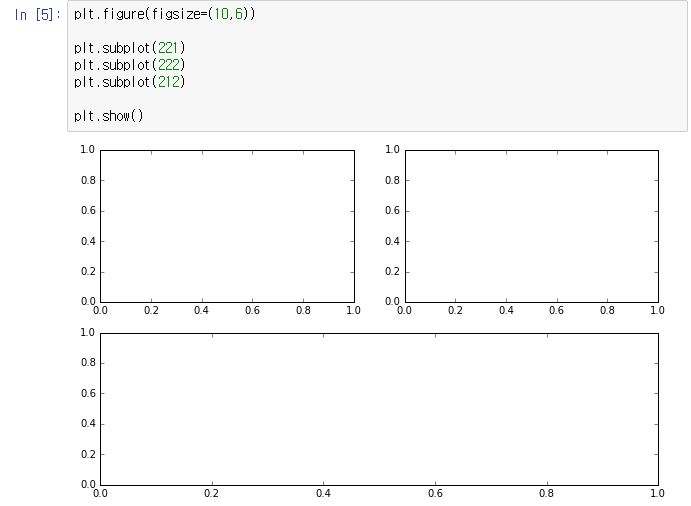

In [72]:
##sns(seaborn)의 countplot을 활용하겠습니다.
#countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다.
plt.figure(figsize=(18, 10))    #표의 프레임크기(가로세로)
목
plt.subplot(211)    #
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('') #위에 ordinary에 데이터정의한거를 type 1 칼럼을 x 축에 대입 / x축에 제목
plt.title("[All Pokemons]")    ##그래프의 헤드

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show() #최종적 출력(없어도 출력이 되긴 함)


NameError: name '목' is not defined

<Figure size 1296x720 with 0 Axes>

In [74]:
##sns(seaborn)의 countplot을 활용하겠습니다.
#countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다.
plt.figure(figsize=(18, 10))



<Figure size 1296x720 with 0 Axes>

<Figure size 1296x720 with 0 Axes>

Text(0.5, 1.0, '[All Pokemons]')

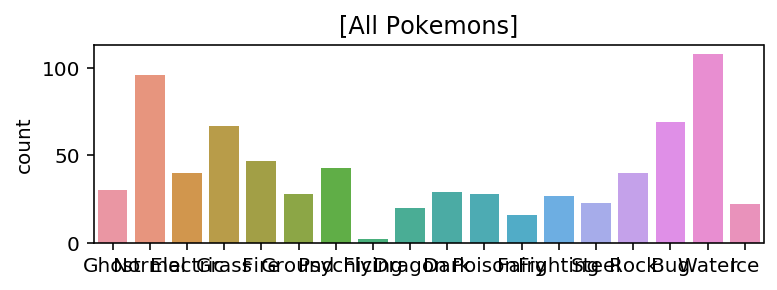

In [75]:
plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[All Pokemons]")    #그래프의 헤드


Text(0.5, 1.0, '[All Pokemons]')

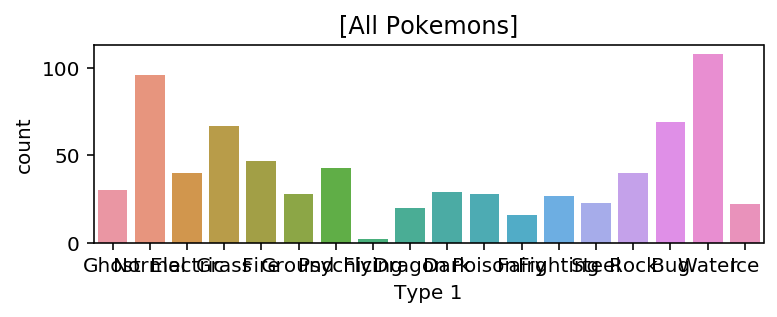

In [76]:
##.set_xlabel('') 의 차이(그래프 x축 헤드 보기
plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types)
plt.title("[All Pokemons]")    #그래프의 헤드


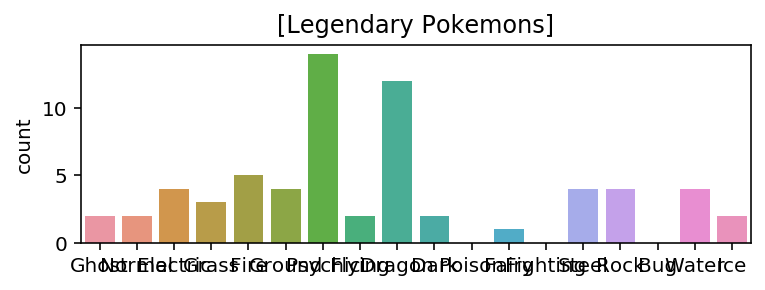

In [77]:
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [78]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)
##sort 정렬하는데 ascending = flase 내림차순으로 정e 내림차순으로 정렬e 내림차순으로 정e 내림차순으로 정렬렬

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


In [79]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


#  13-8. 모든 스텟의 총 합

In [80]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats
# 칼럼명이 겹치는 데이터 출력

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [81]:
pokemon.head(1) # 테이블 형식으로 보기

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [82]:
pokemon.loc[0] #index가 0에 위치한 데이터 정보

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
Total               318
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

In [83]:
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"]))
print("total: ", int(pokemon.loc[0, "Total"]))  #index 가 0인 값의 칼럼명이 "total"인 값 출력
print("stats: ", list(pokemon.loc[0, stats]))    #index가 0인 값의 status 칼럼들에 해당하는 값 출력
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [84]:
##axis=1 가로방향 으로 더하기
##total 일과 status의 총합이 같은 포켓몬은 800마리 == 전체 데이터 수와 동일
## true =1 다 더했을 때 전체 데이터 수와 동일
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

In [85]:
(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

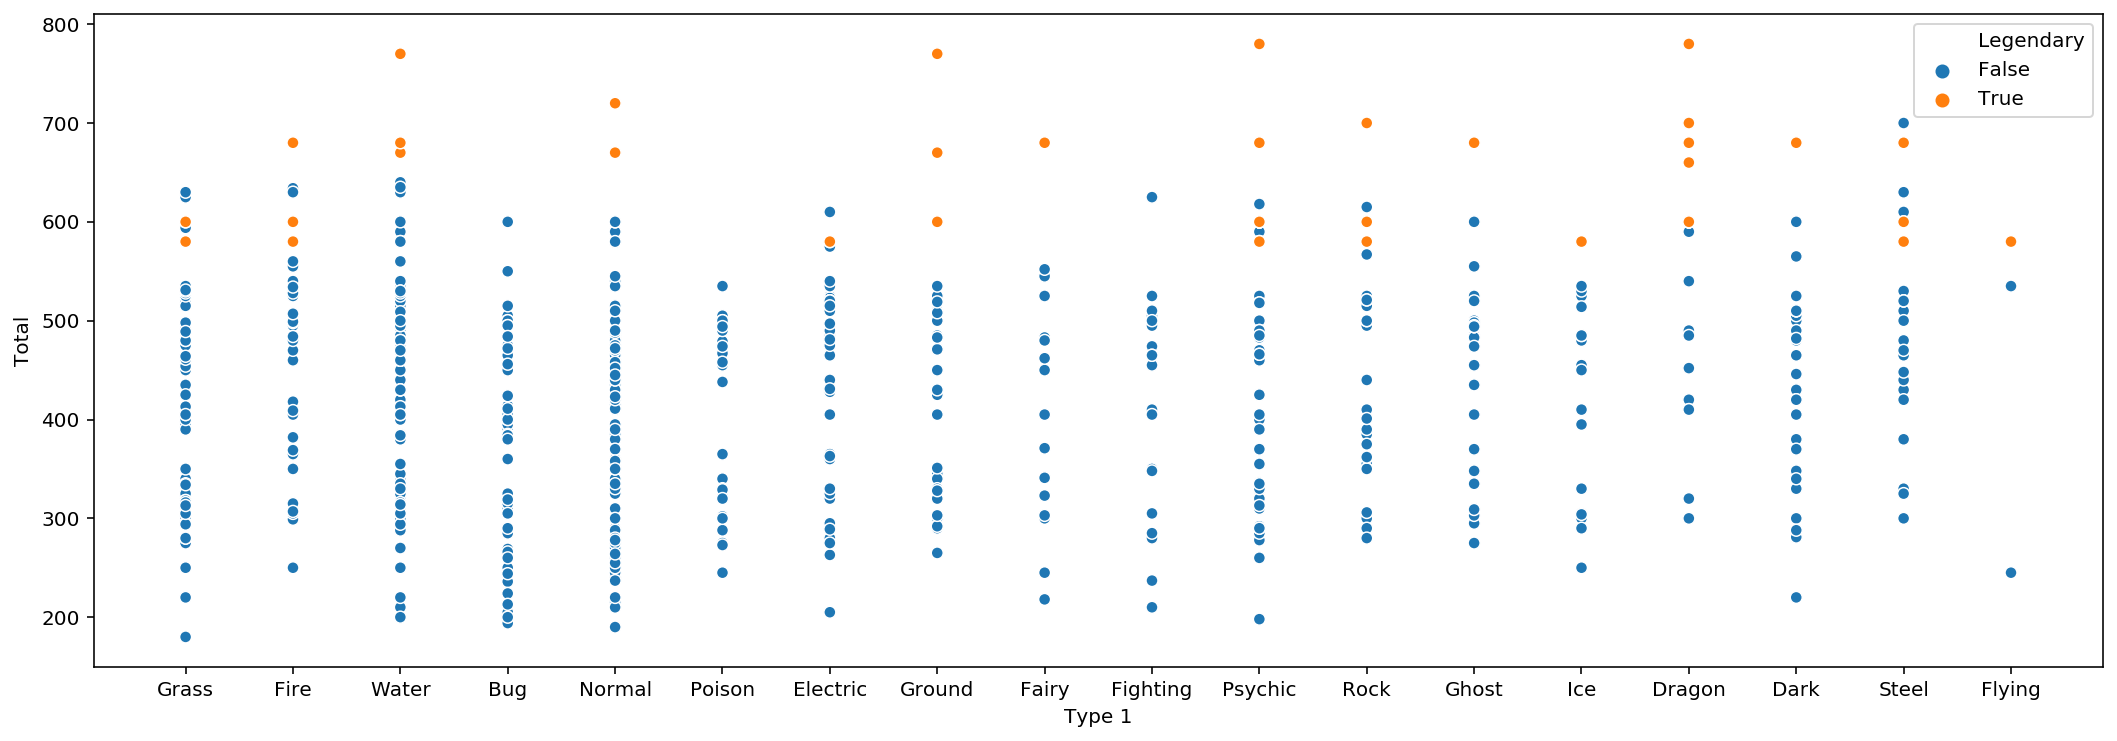

In [86]:
#그래프의 프레임생성
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)


#legendary변수별 x에 type1칼럼 / y에 total 분포도
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

# 13-9. 전설의 포켓몬 세부 데이터 살펴보기

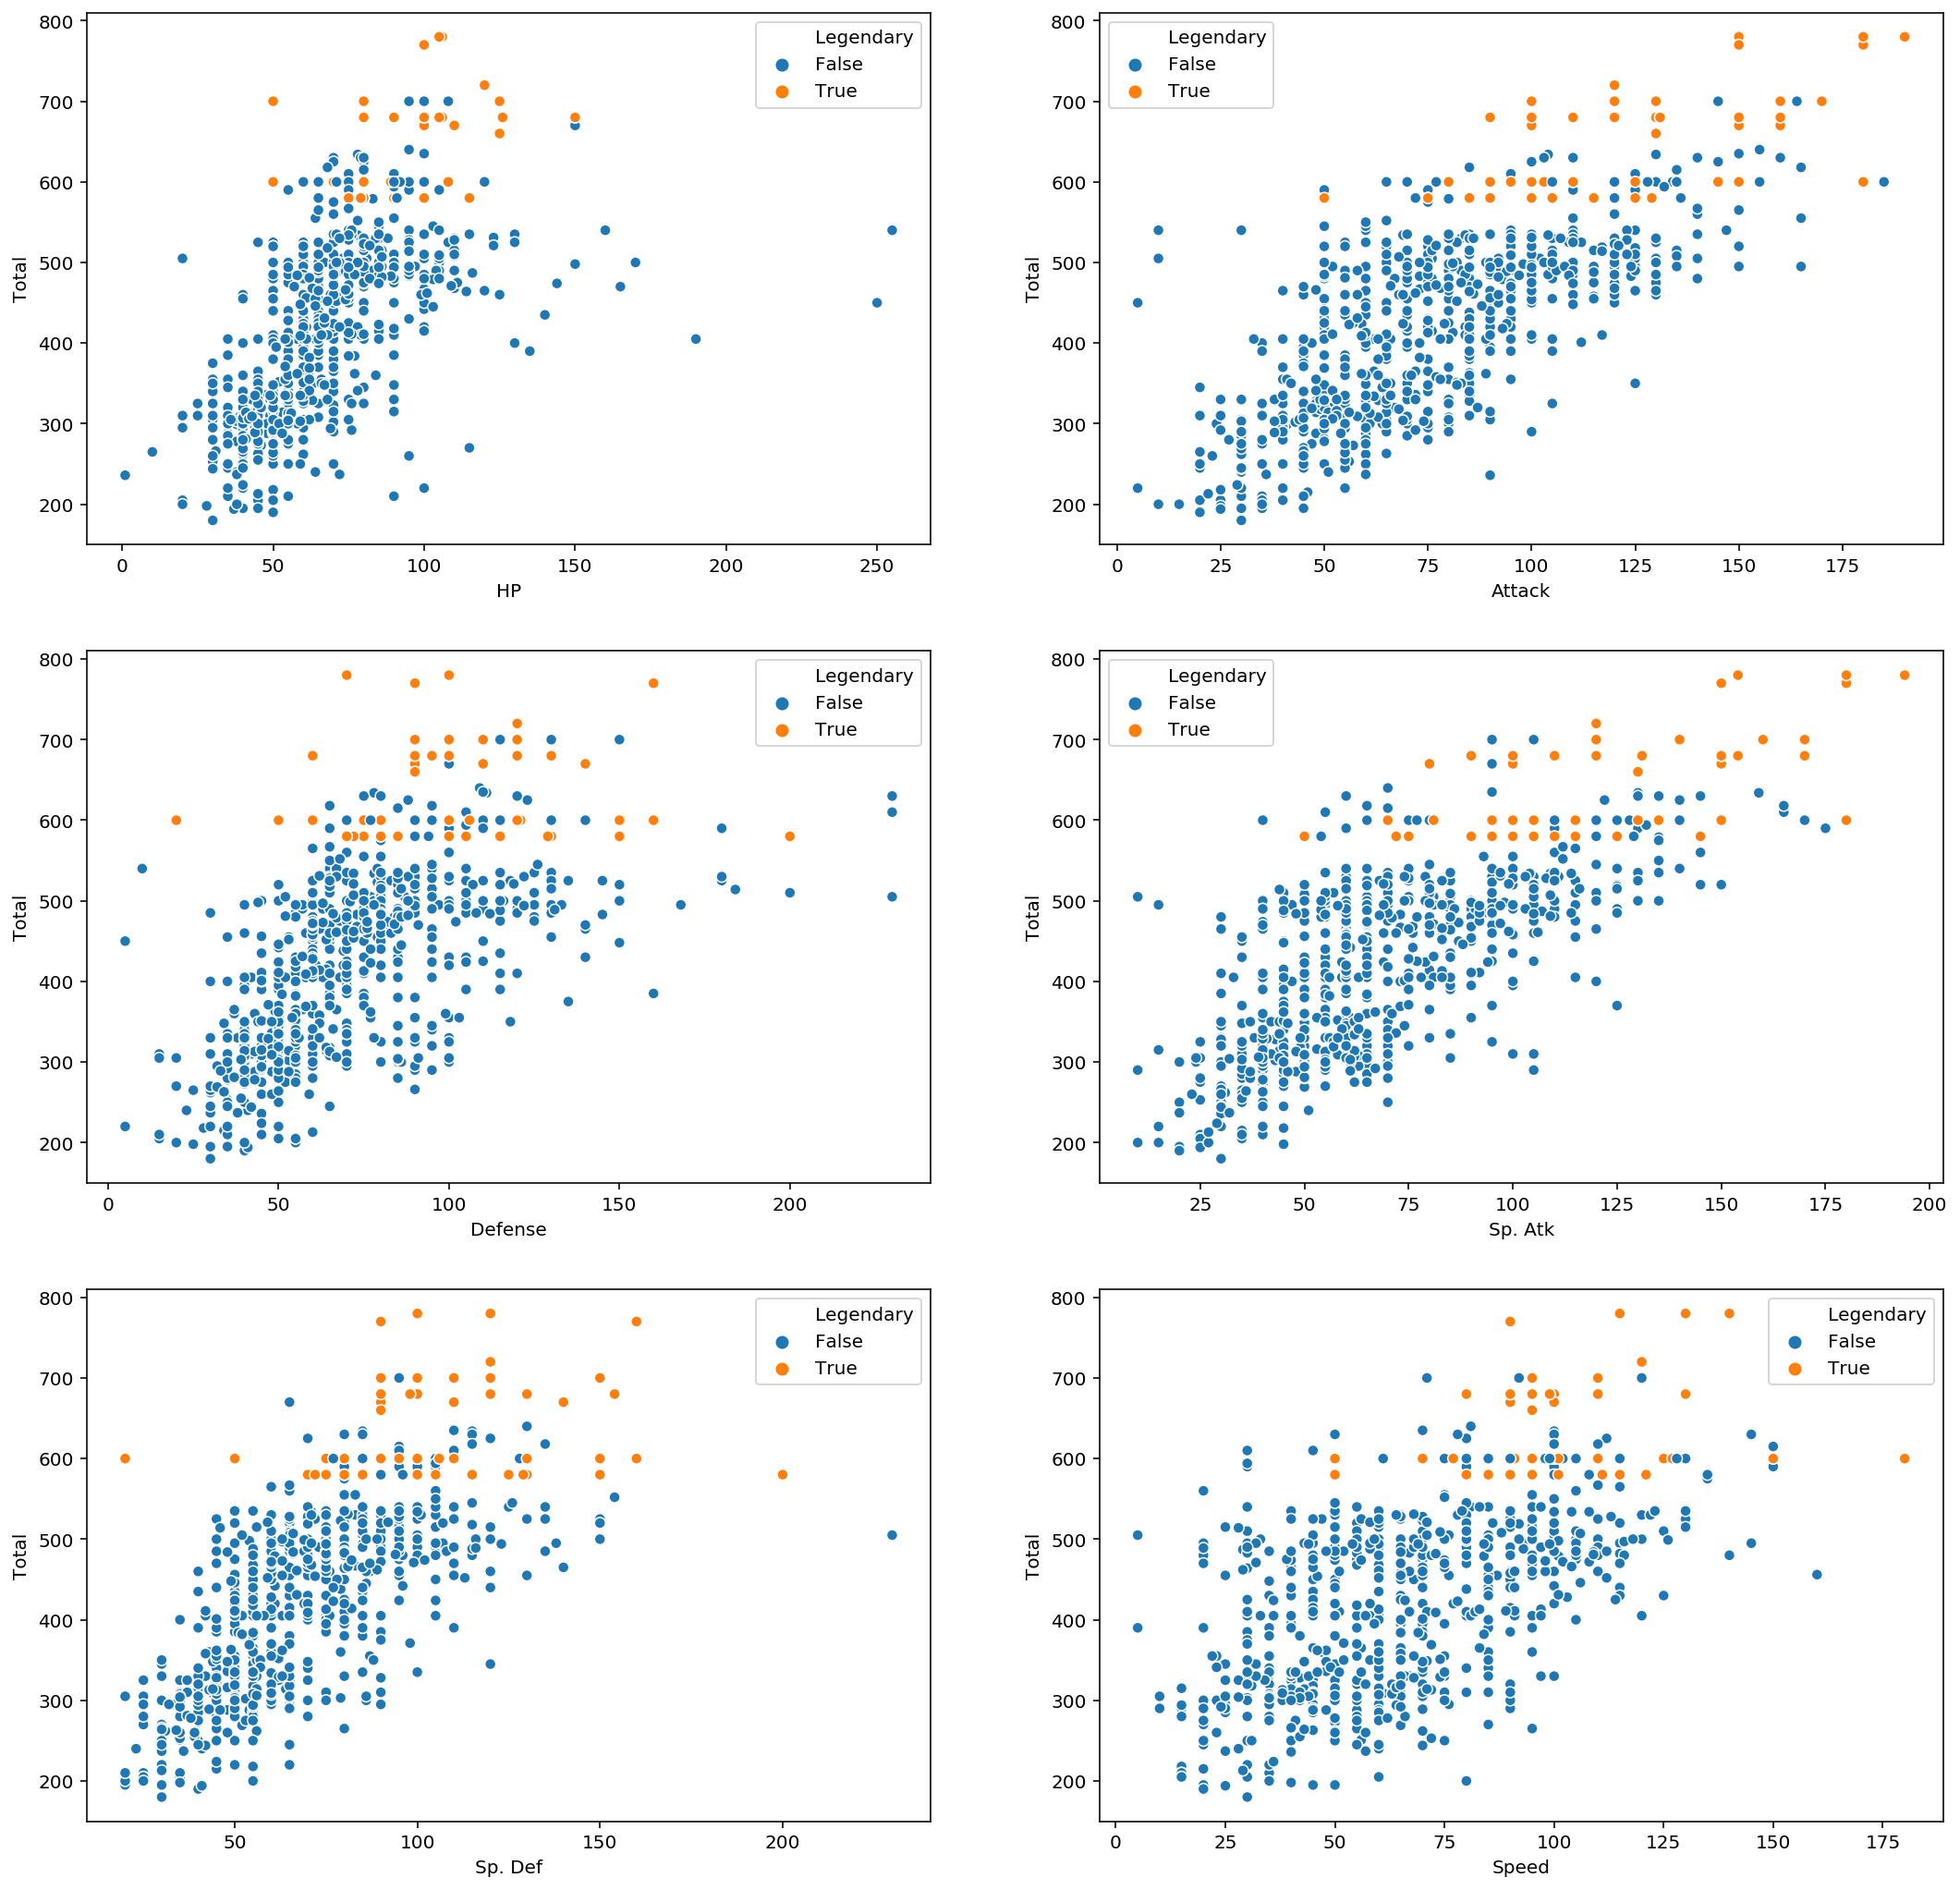

In [87]:
#세부 스탯(칼럼별 데이터 분포)
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

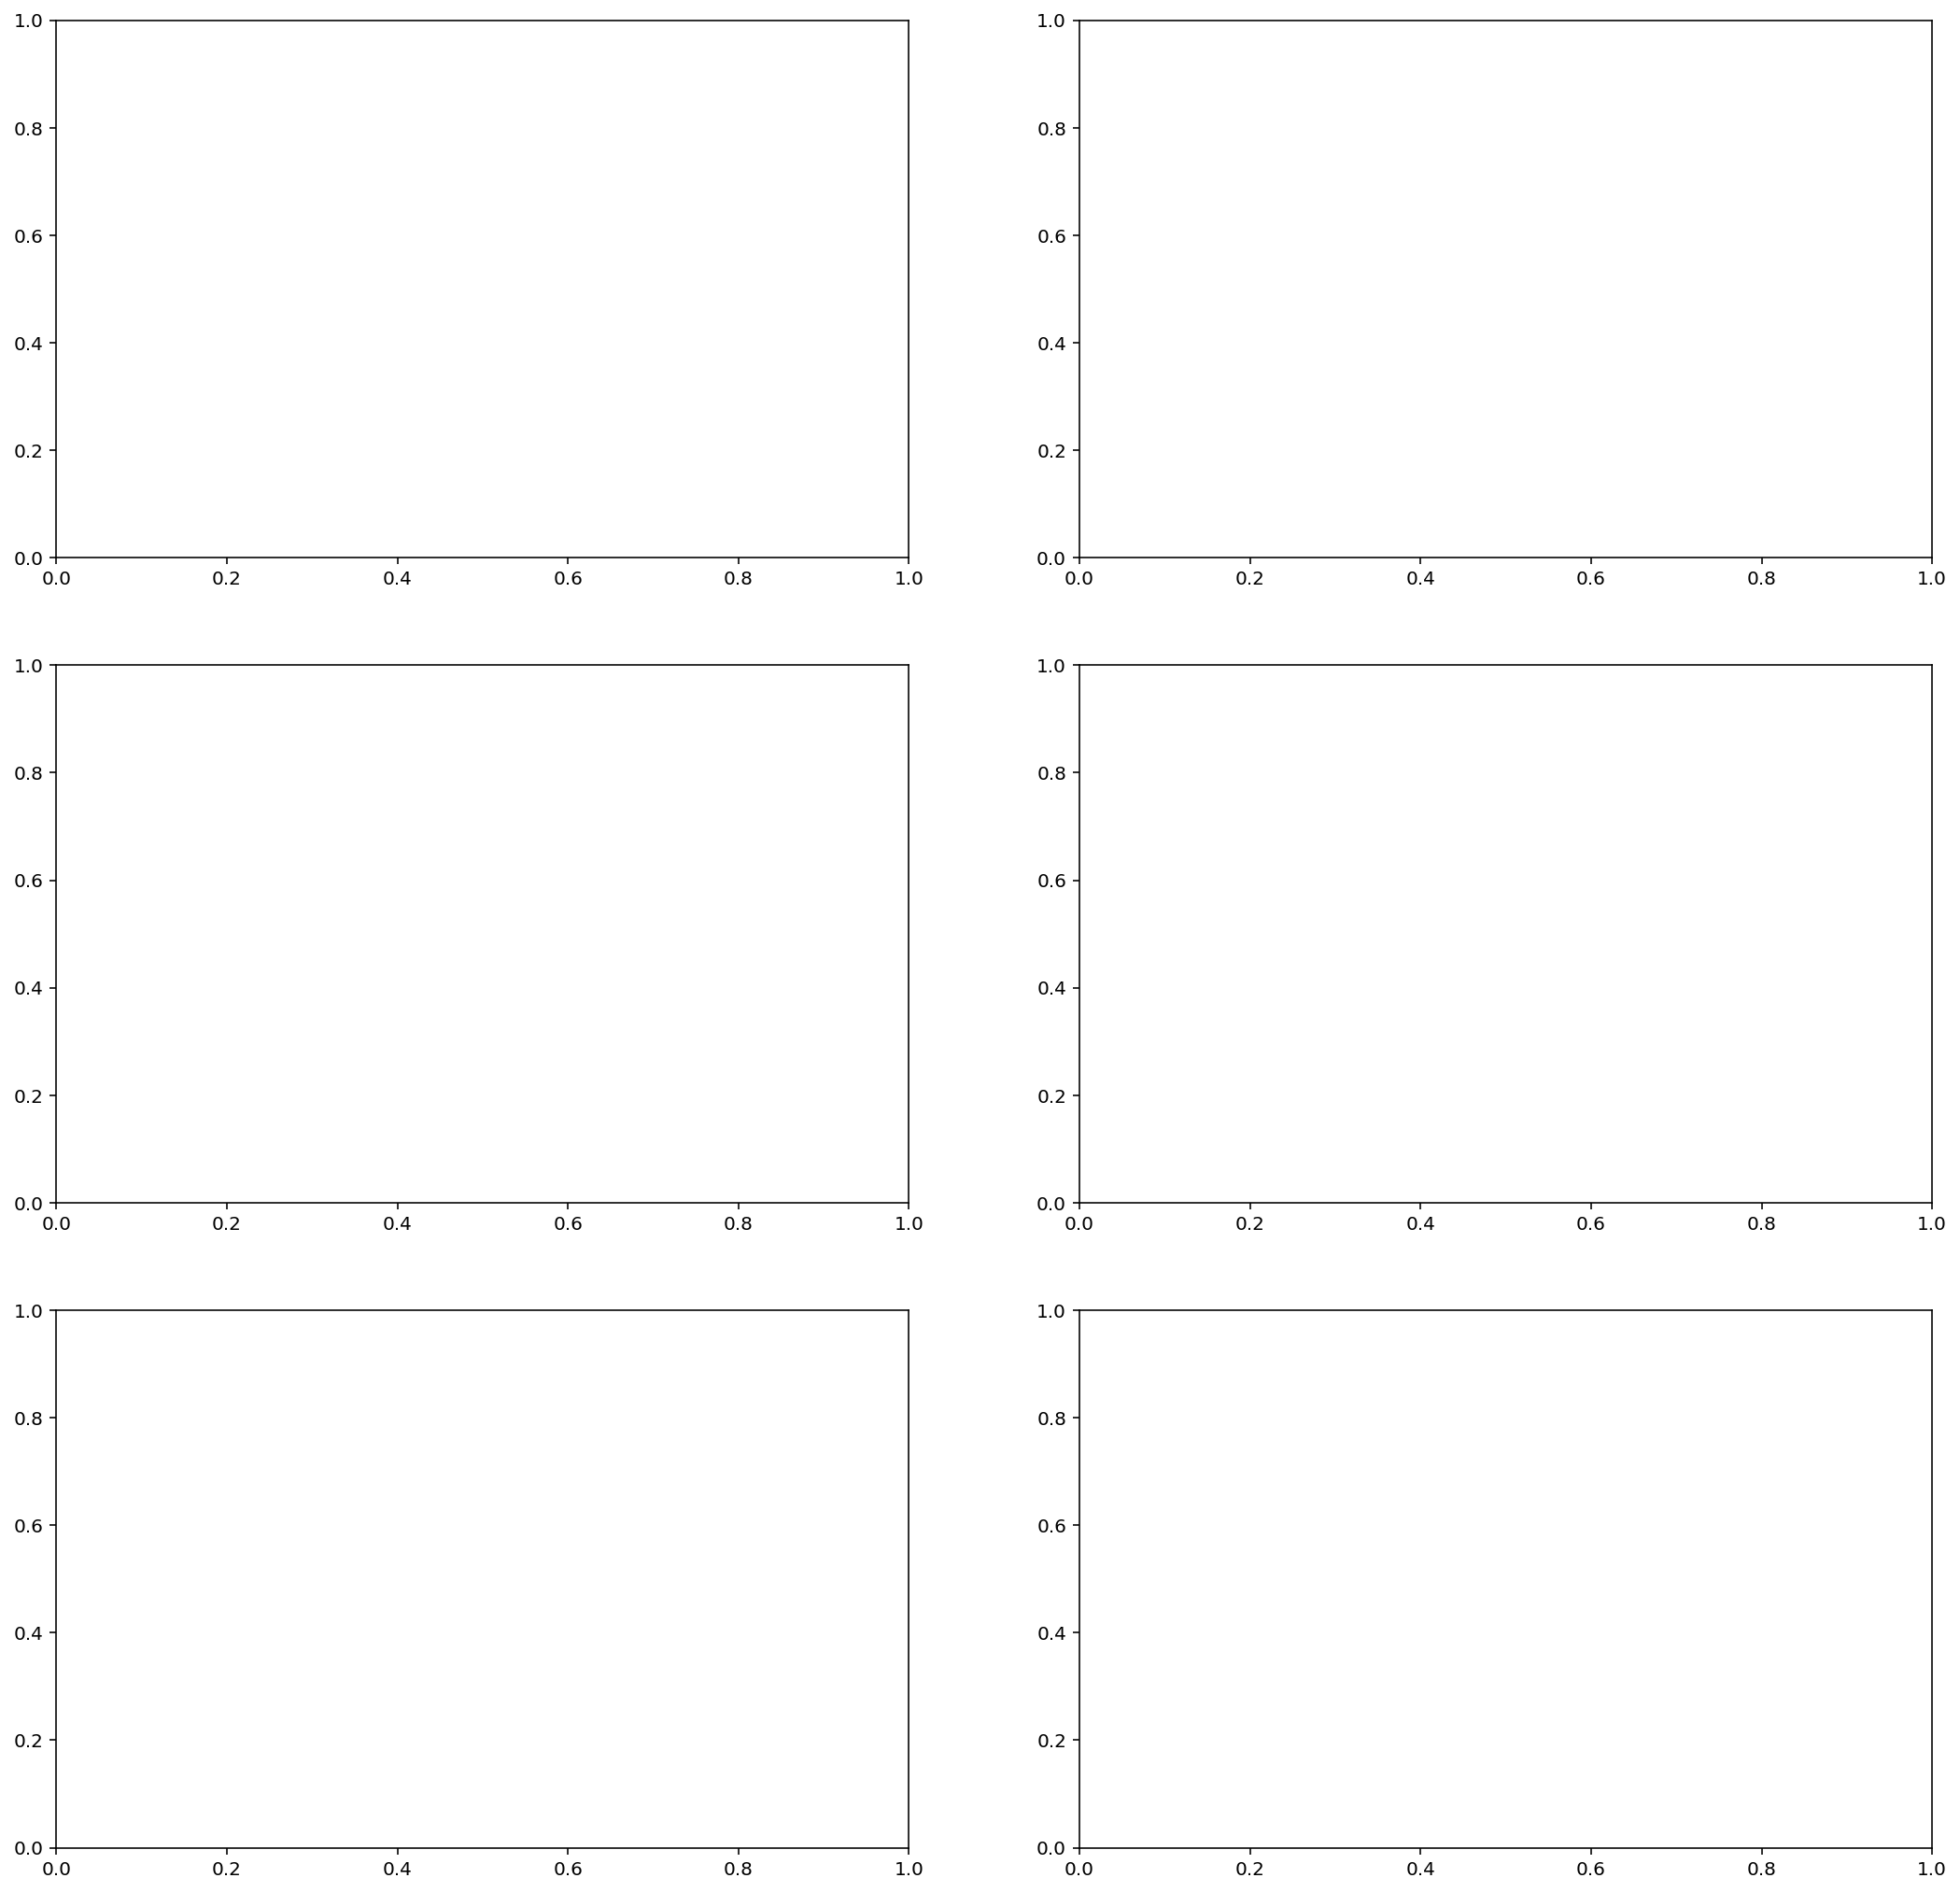

In [88]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

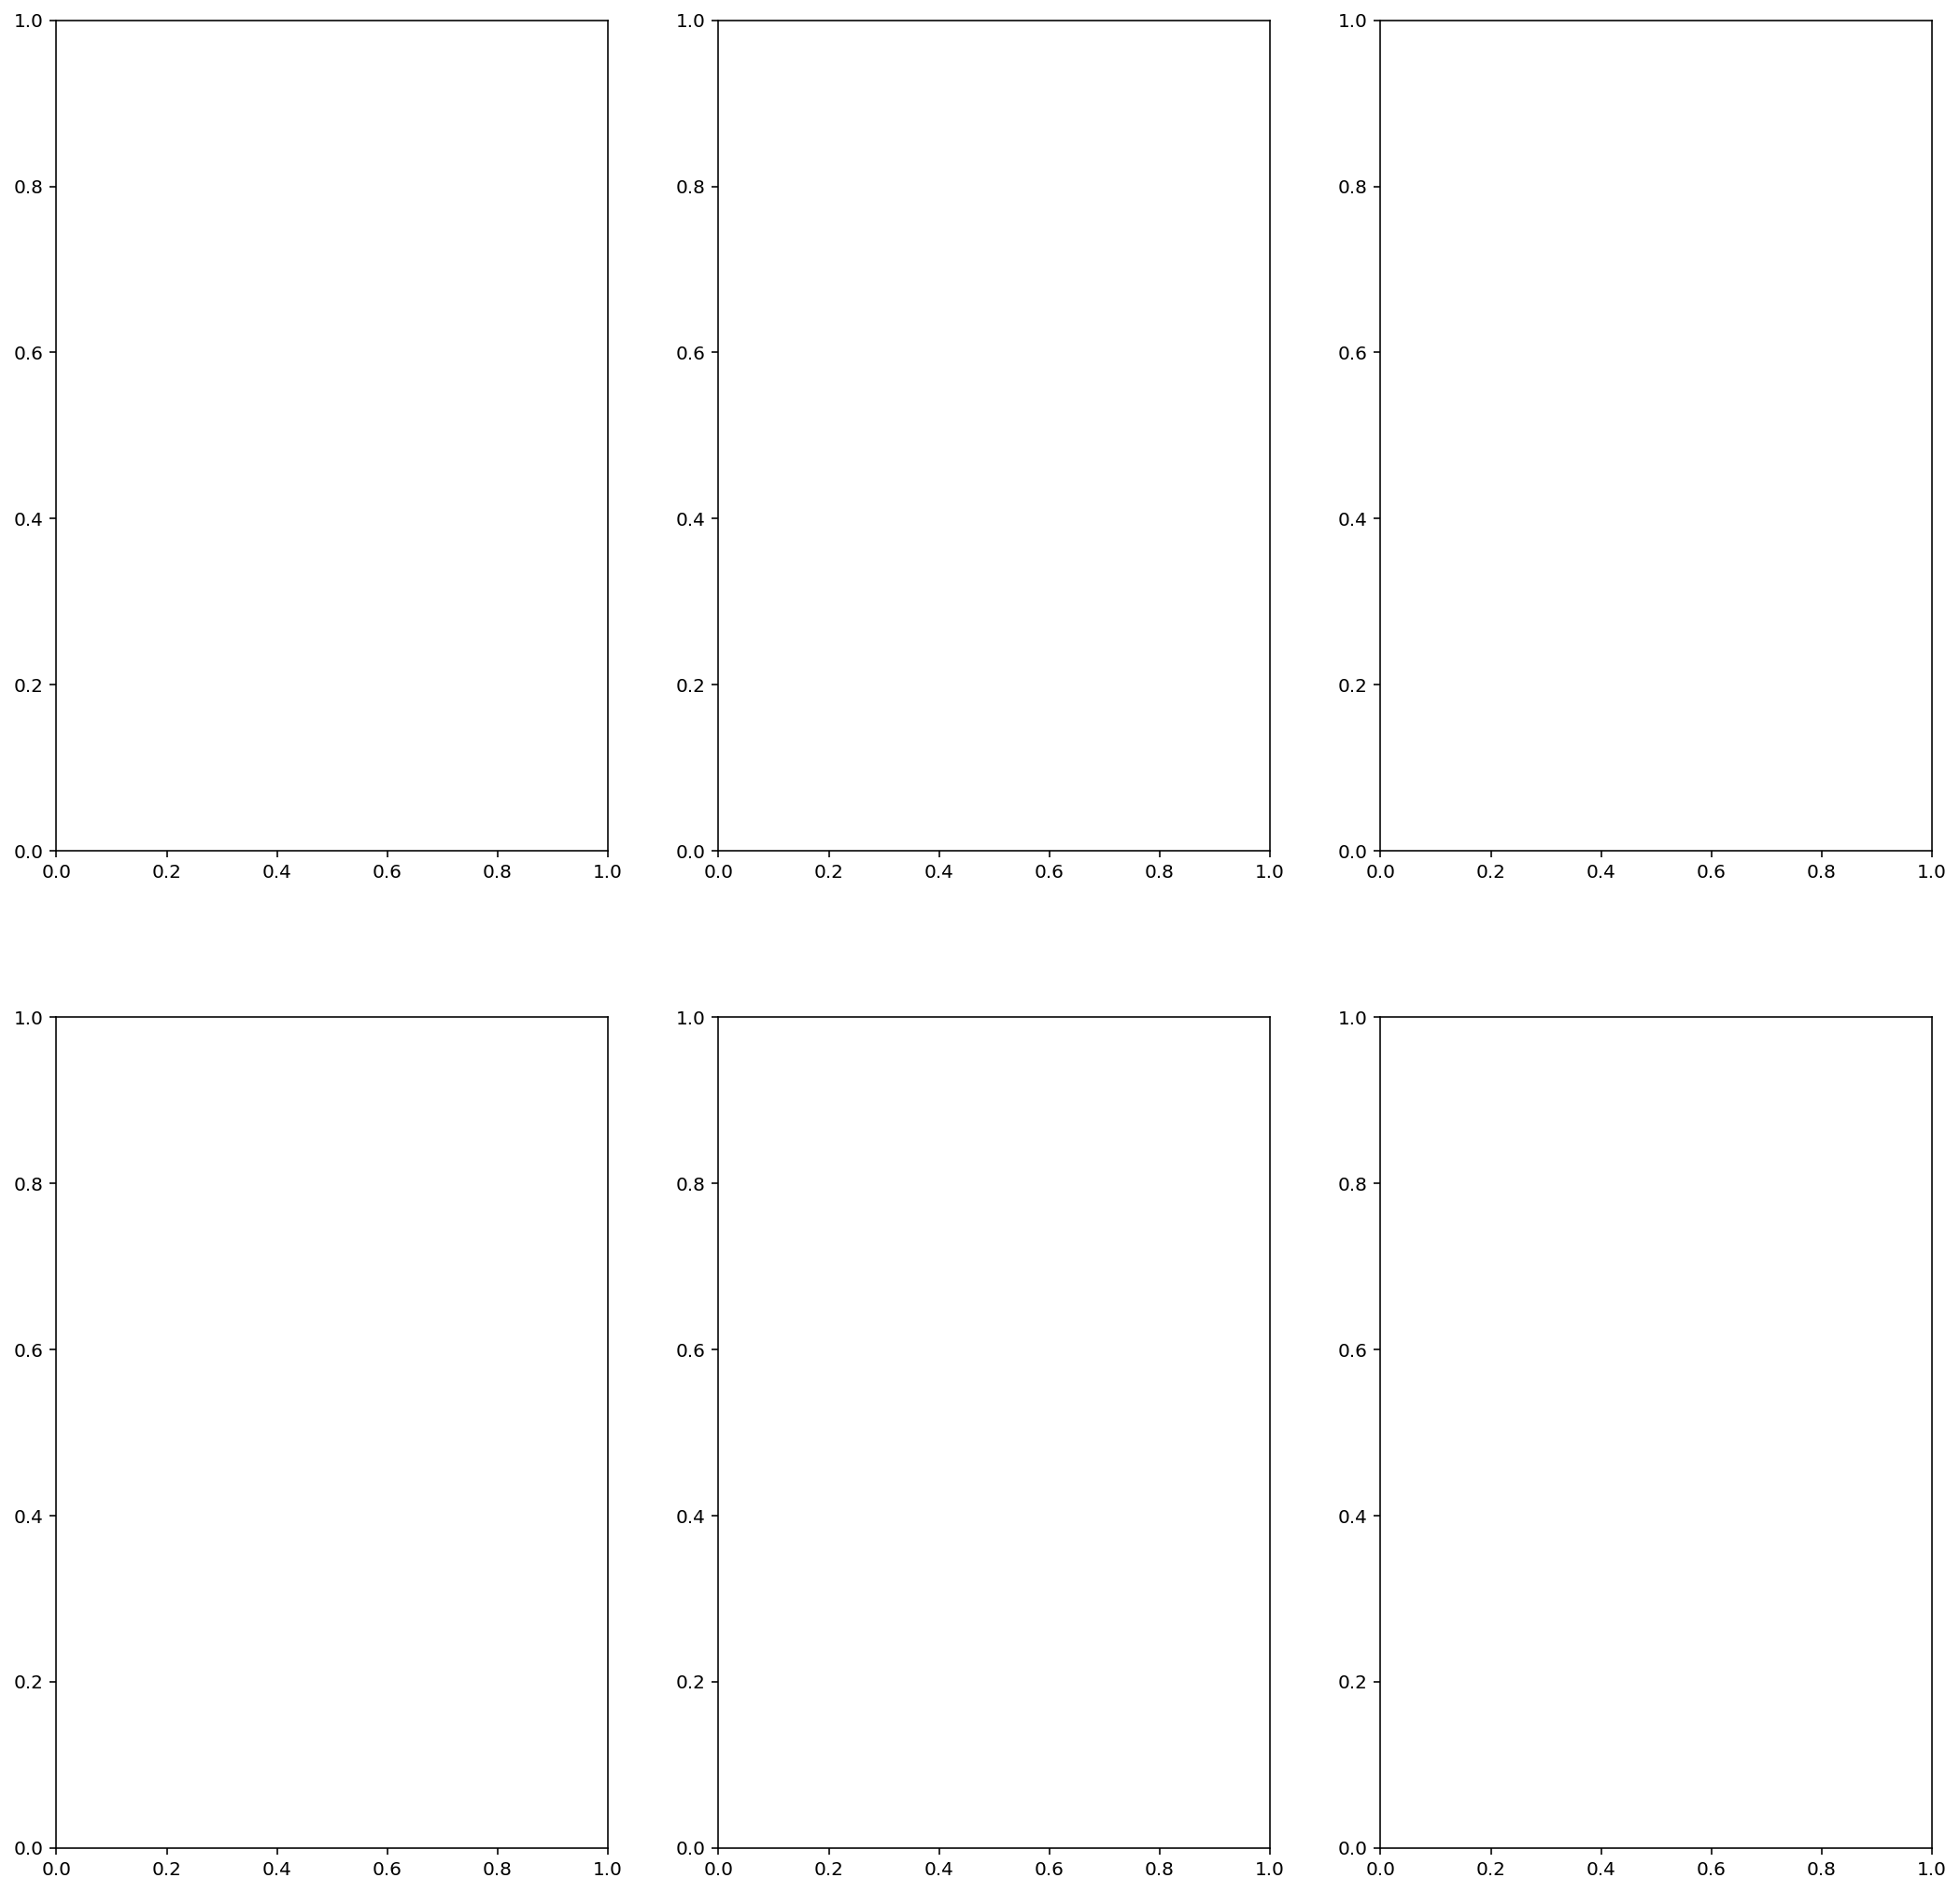

In [89]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 18)

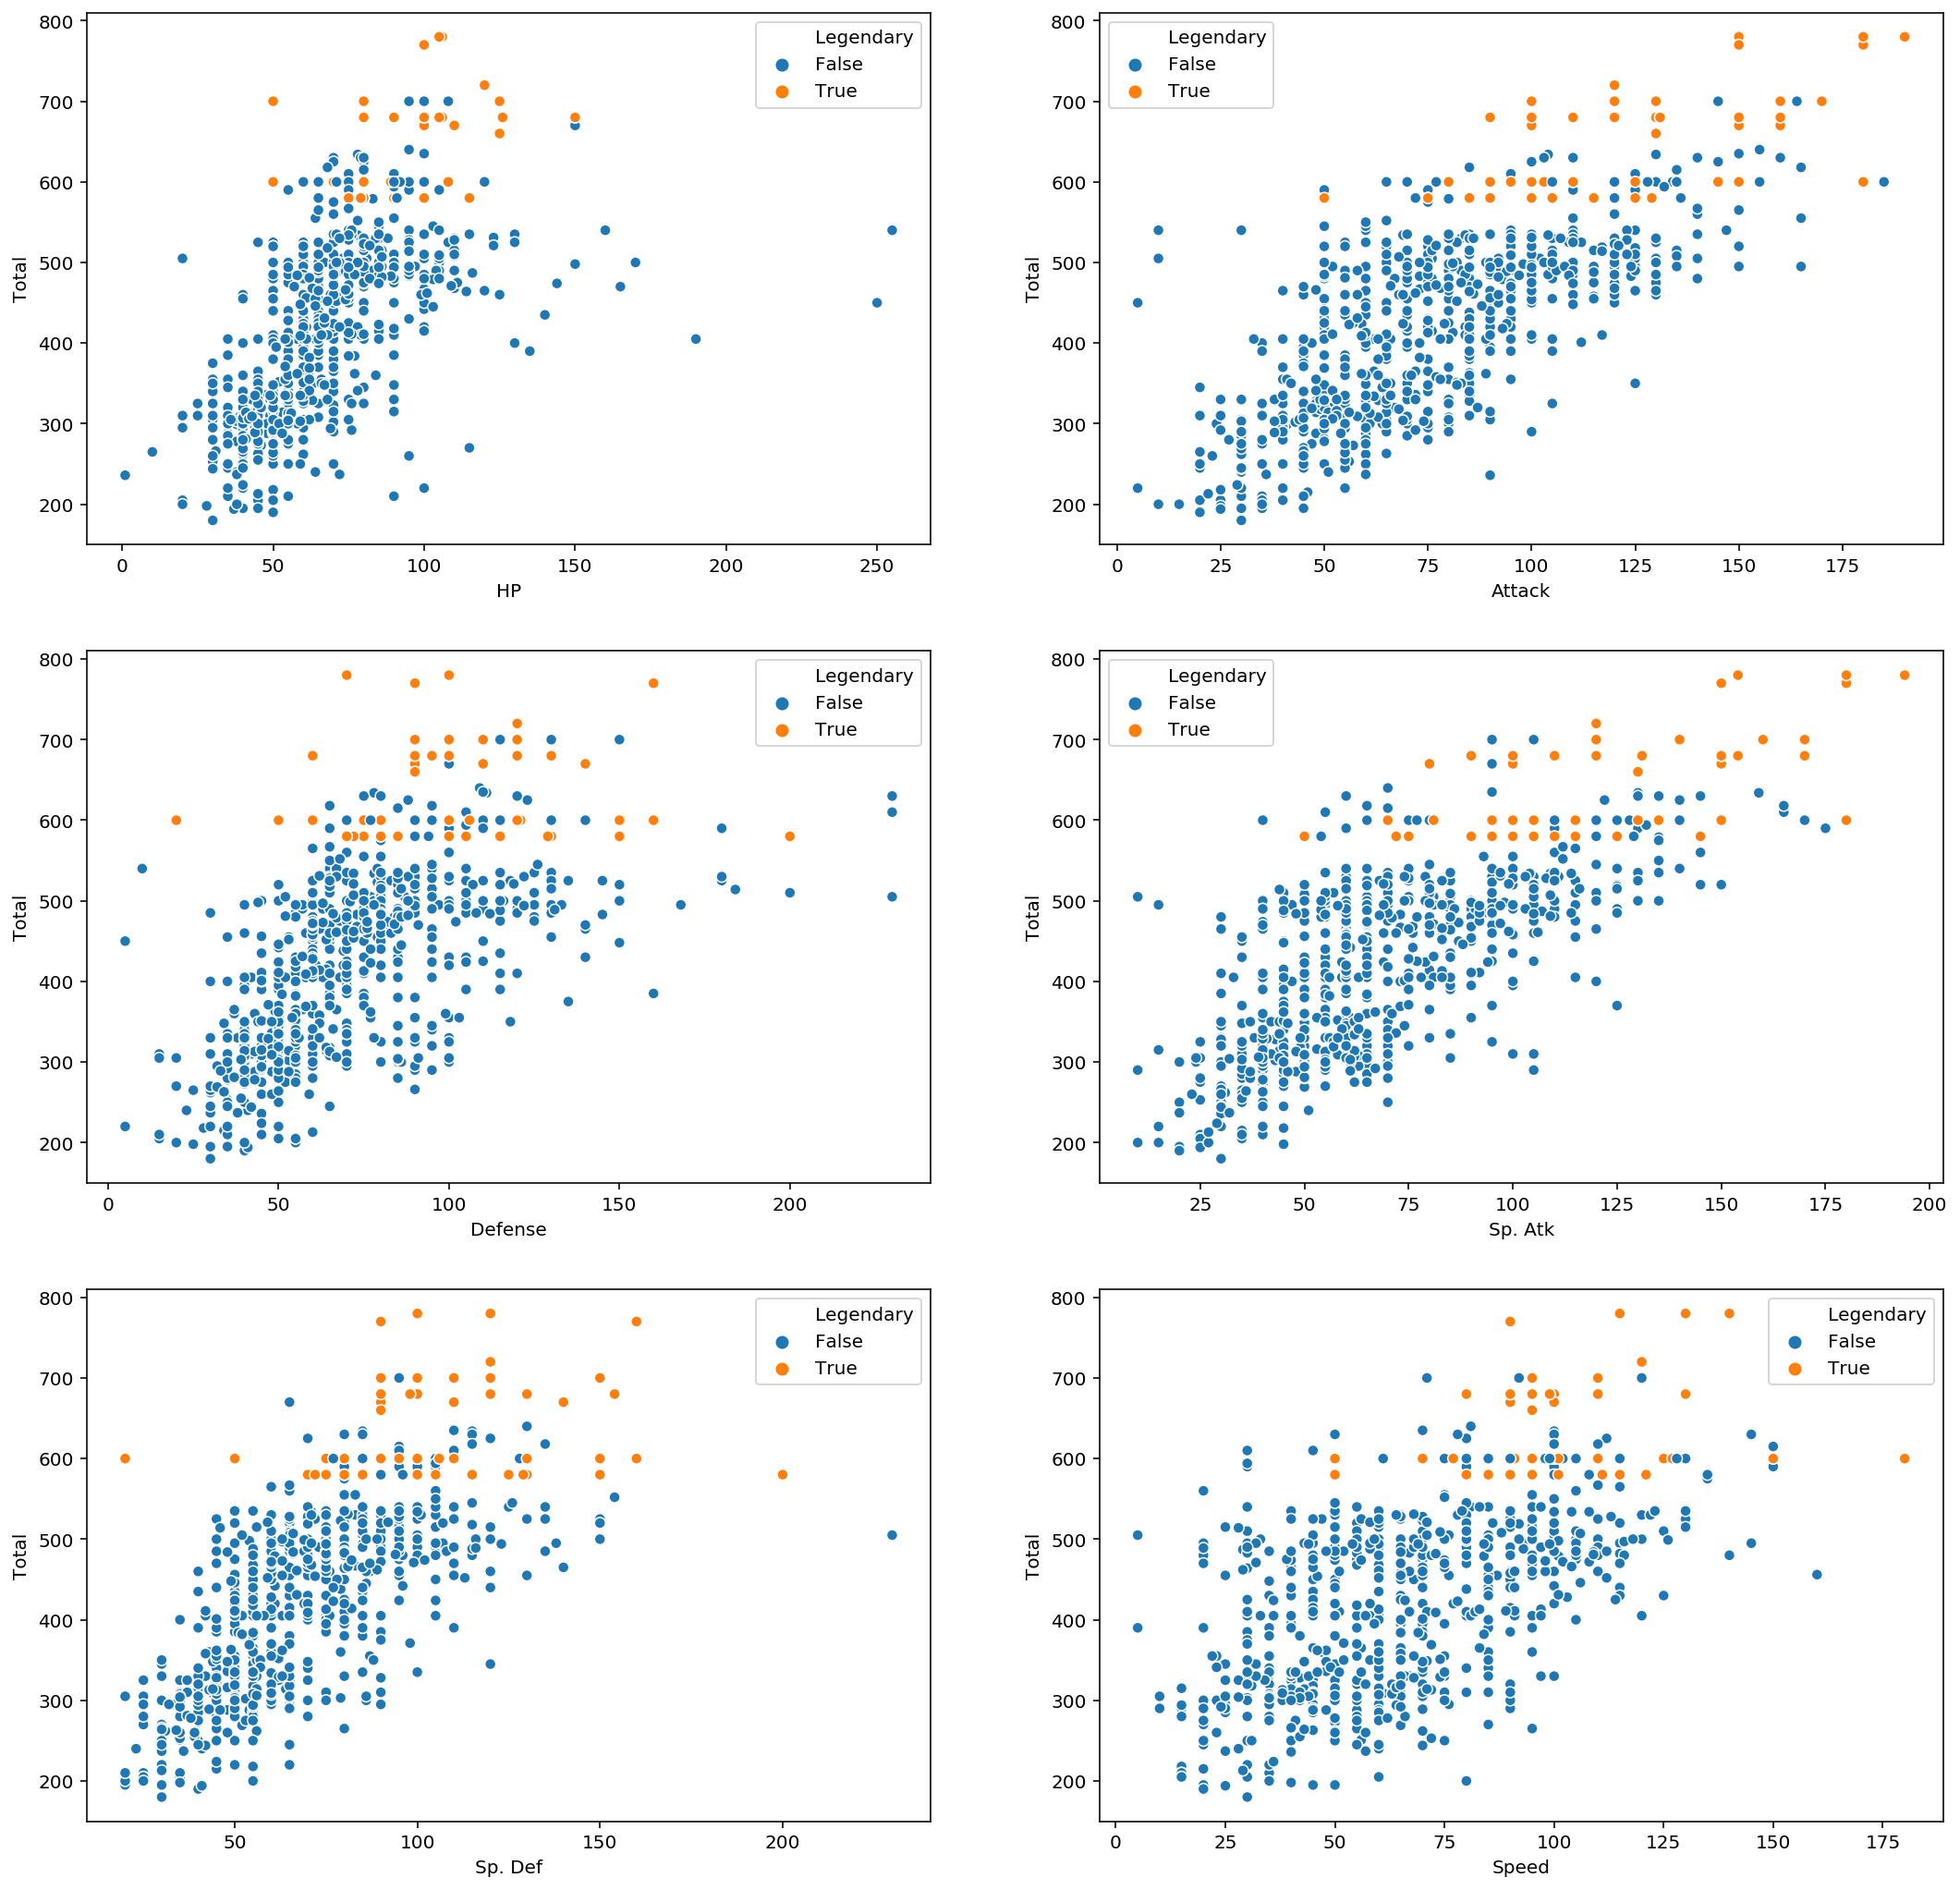

In [90]:
#세부 스탯(칼럼별 데이터 분포)
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

### 위의 표 해석

    HP, Defense, Sp. Def
        전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있었다.
        그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다.
        (ex. 방어형, 공격형 등)

    Attack, Sp. Atk, Speed
        이 세 가지 스탯은 Total과 거의 비례한다. 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다.


# 13-10. 각 세대별 전설의 포켓몬

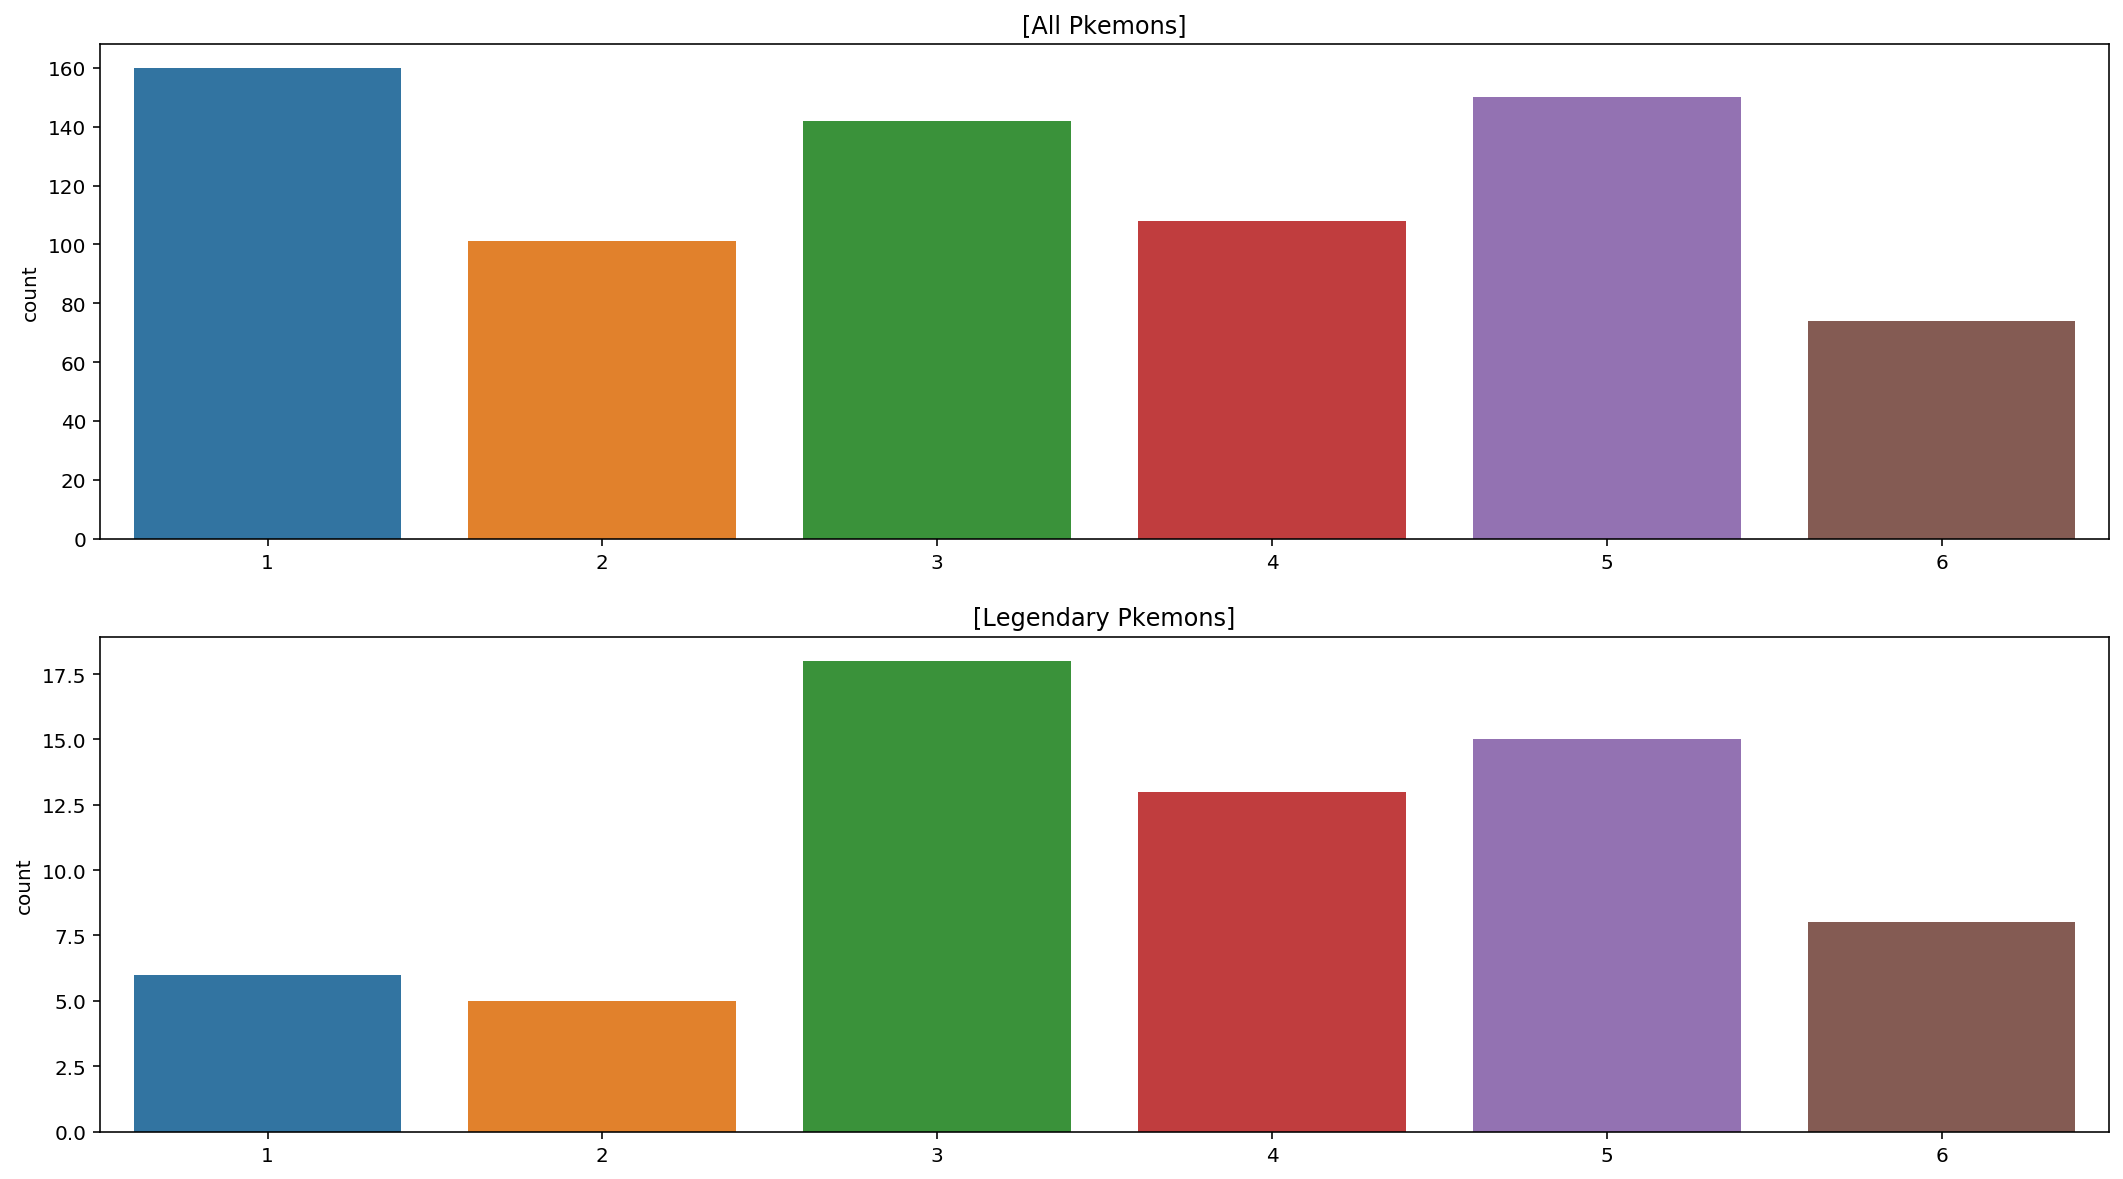

In [91]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()

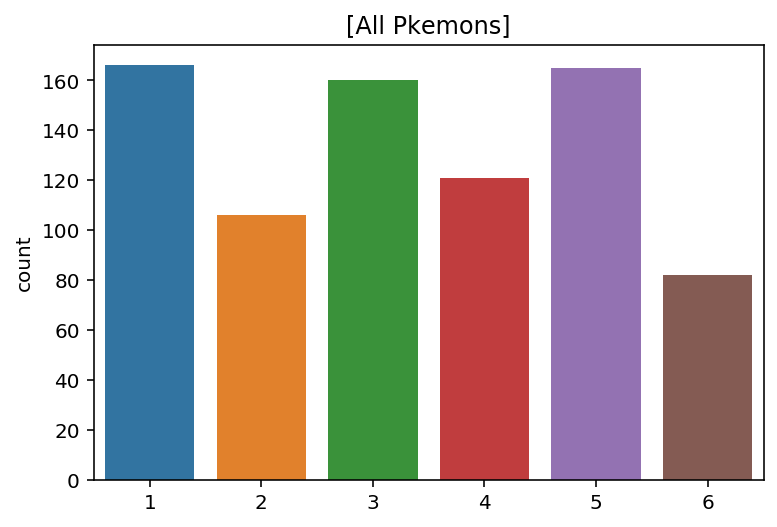

In [92]:
# pokemon 데이터 (전체 데이터)의 세대별 분포도
sns.countplot(data=pokemon, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")
plt.show()

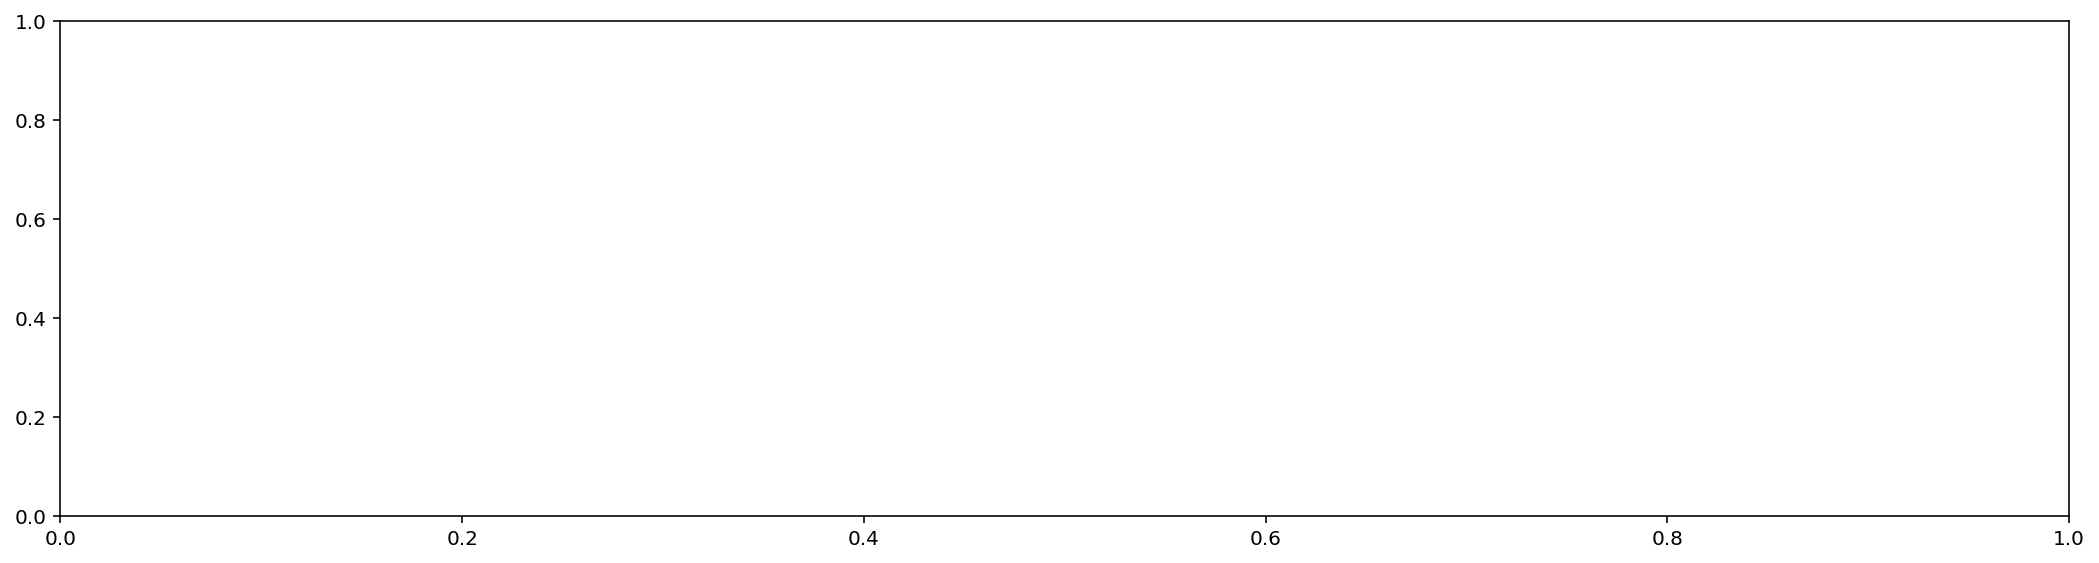

In [93]:
plt.figure(figsize=(18, 10))
plt.subplot(211)

In [94]:
plt.figure(figsize=(18, 10))
plt.subplot(210)

ValueError: num must be 1 <= num <= 2, not 0

<Figure size 1296x720 with 0 Axes>

# 13-11.

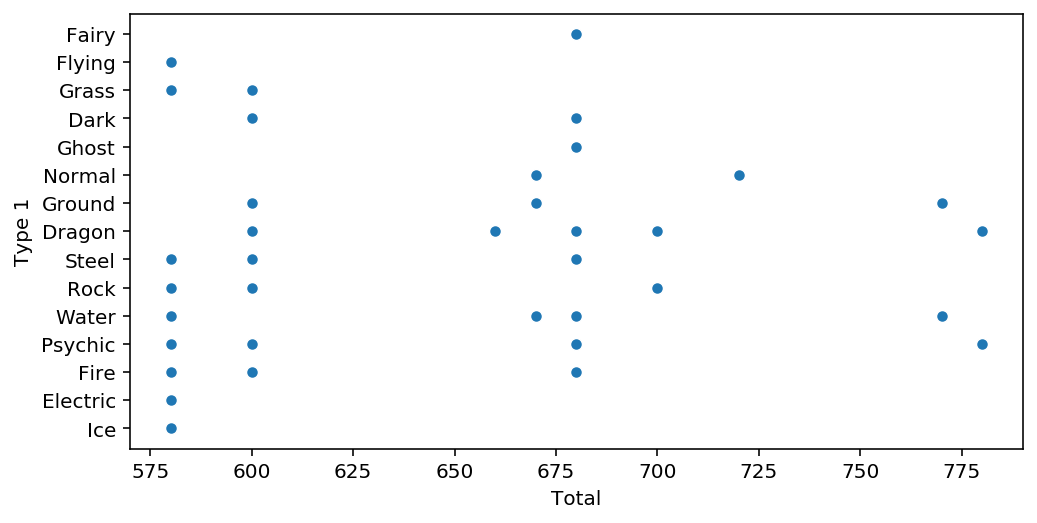

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

### 분석
    전설의 포켓몬들의 total값들이 600 등과 같은 특정 점에 몰려있다.

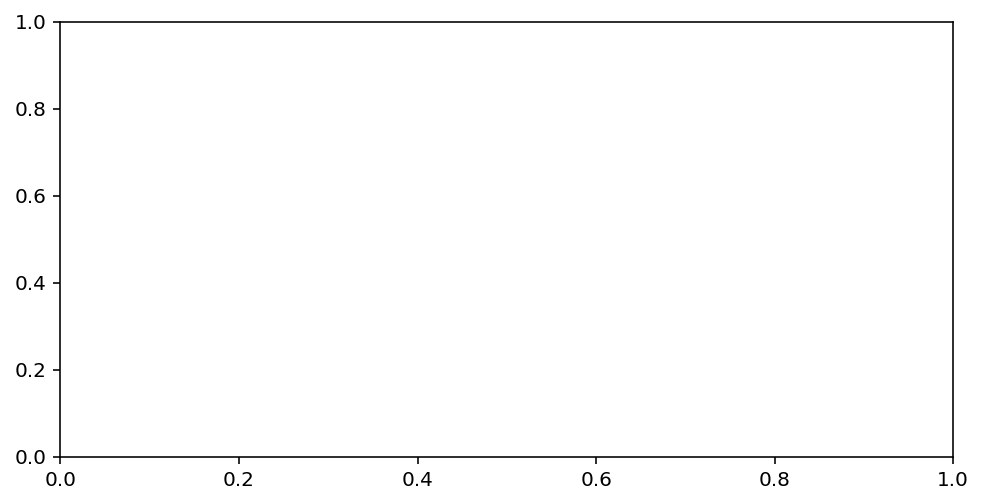

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)


In [98]:
#total 값중 중복제거_오름차순
sorted(list(set(legendary["Total"])))   

[580, 600, 660, 670, 680, 700, 720, 770, 780]

In [99]:
#total 값중 중복제거_등장순으로
list(set(legendary["Total"]))    

[770, 580, 680, 780, 720, 660, 600, 700, 670]

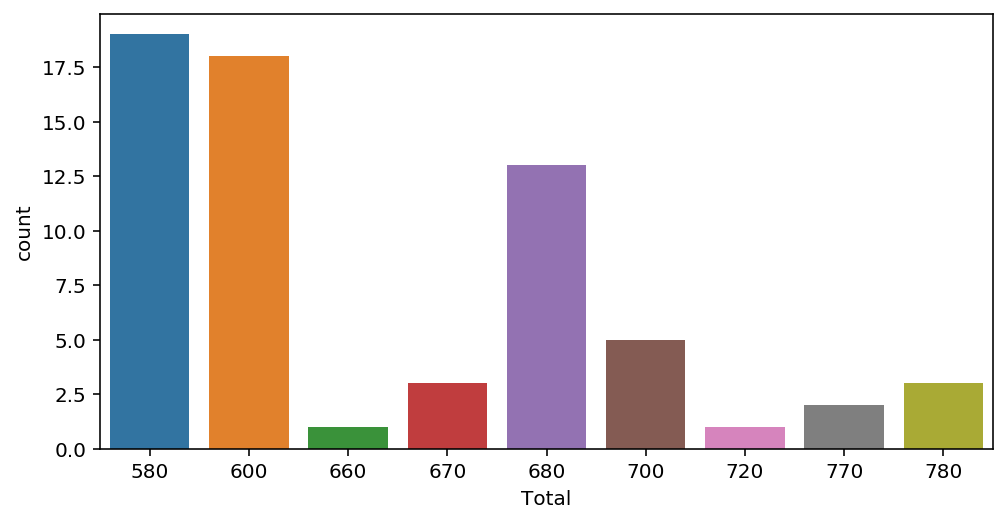

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [101]:
#65마리가 9개의 값을 가짐_소수점2자리까지 
round(65 / 9, 2)
##약 7.22마리 끼리는 같은 total 값을 가짐

7.22

In [102]:
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [103]:
len(sorted(list(set(ordinary["Total"]))))

195

In [104]:
#일반포켓몬은 총 195가지의 total 값을 가지고 전체 일반은
# 800-65 이므로
round(735 / 195, 2)

3.77

이로써 다음 두 가지를 알 수 있습니다.

    Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 된다. 즉 전설의 포켓몬의 Total값은 다양하지 않다.
    : 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.

    또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다. ex) 680, 720, 770, 780
    : Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있다.

즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

# 13-12. 이름기준 전설의 포켓몬과 일반 포켓몬 차이

In [105]:
#비슷한 이름을 가진 포켓몬들의 모임
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [106]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]

In [107]:
n1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [108]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [109]:
#길이를 구하고 name_count칼럼에 넣어줌
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [110]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


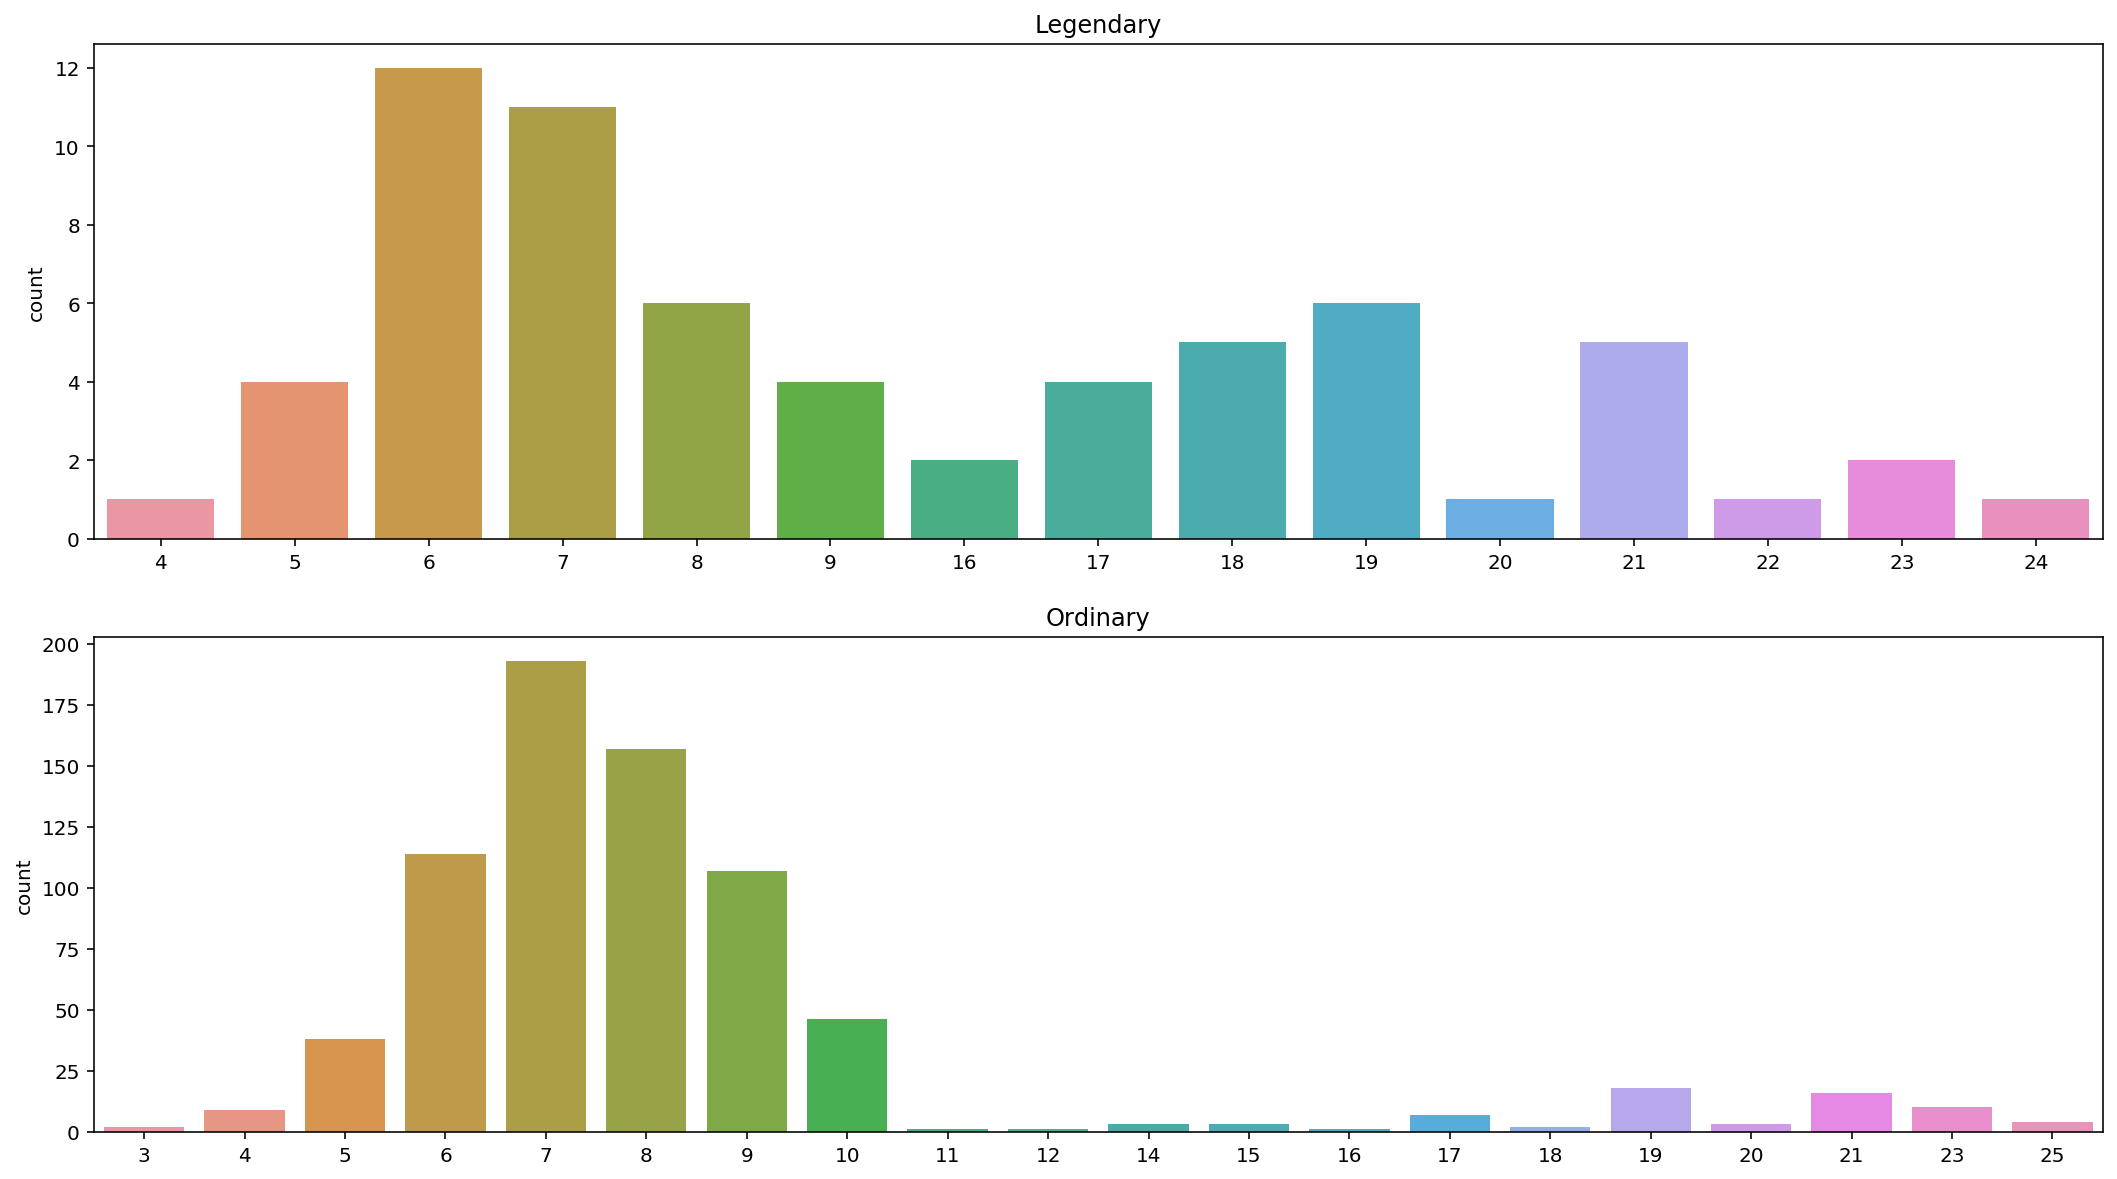

In [111]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [112]:
#전설의 포켓몬의 이름이 10이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [113]:
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


# 13-13. 데이터전처리하기_1
1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성

2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리


In [114]:
#name_count칼럼 및 하기 데이터 추가
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [115]:
#name_count칼럼 및 하기 데이터 추가
pokemon["colum_test"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()
##pokemon["colum_test"] 만 해서 칼럼생성은 안됌 하기데이터까지 넣어야 출력완료

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,colum_test
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,10


In [116]:
#이름길이가 10이상이면 true, 미만이면 false
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,colum_test,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,10,True


# 13-14. 데이터전처리_2 토큰추출
이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기

이 중 가장 먼저 '알파벳이 아닌 문자'를 포함하는 경우를 처리하도록 하겠습니다.
어떤 문자열이 알파벳으로만 이루어져 있는지를 확인하고 싶을 때는 isalpha() 함수를 사용하면 편리합니다. 

###우리는 알파벳이 아닌 문자를 포함하는 이름을 걸러내고 싶은데, 주의할 점은 이름에 띄어쓰기가 있는 경우에도 isalpha() = False로 처리된다는 점입니다.

In [117]:
##띄어쓰기제거
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,colum_test,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,9,False,Volcanion


In [118]:
##isalpha함수를 이용해 이름이 알파벳으로만 이루어졌는지확인 ==true/fasle
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,colum_test,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,10,True,Charmander,True


In [119]:
#다른 문자가 이름에 포함된 경우 == false
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 18)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,colum_test,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,16,True,Zygarde50%Forme,False


In [120]:
##문자열 바꿀때_pandas의 replace
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,colum_test,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,16,True,Zygarde50%Forme,False


In [121]:
##replace한 이름들 재확인
ppokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

NameError: name 'ppokemon' is not defined

In [122]:
#정규식 re패키지
import re

In [123]:
name = "CharizardMega Charizard X"

In [124]:
#이름을 공백기준으로 쪼개기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [125]:
#첫번째 요소를 쪼갬
temp = name_split[0]
temp

'CharizardMega'

In [126]:
#대문자로 시작해서 소문자로 끝나는 토큰들로 분리
#re 패키지의 findall함수이용해서 실행
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

[A-Z][a-z]* == 정규표현식
    
    [A-Z] : A부터 Z까지의 대문자 중 한 가지로 시작하고,
    [a-z] : 그 뒤에 a부터 z까지의 소문자 중 한 가지가 붙는데,
    * : 그 소문자의 개수는 하나 이상인 패턴 (*는 정규표현식 중에서 "반복"을 나타내는 기호)

==첫글자가 대문자인 단어들을 분리하는데에 효과적

In [127]:
#반복문으로 합치면 한개의 이름을 이루고 있는 모든 토큰을 모을 수 있음
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [128]:
##토큰화과정을 모든 이름에 적용시킬 수 있는 함수 생성
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [129]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [130]:
#전설의 포켓몬에 적용
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

### list 또는 set의 자료형에서 각 요소의 개수를 다루고 싶을 때에는 파이썬의 collection이라는 패키지를 사용하면 편리합니다.
collection은 순서가 있는 딕셔너리인 OrderedDict, 요소의 개수를 카운트하는 Counter 등 여러 다양한 모듈을 제공합니다.

이 중 우리는 토큰이 사용된 개수를 알고싶기 때문에 Counter 객체를 사용할 것입니다. 

In [131]:
#collections 모듈에 있는 counter 가져오기
from collections import Counter

In [132]:
#counter 객체는 각 요소가 몇개인지 담은 튜플 리스트를 반환
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [133]:
#most_common을 활용하여 요소가 많이 나온 순으로 정렬
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [134]:
#token_set에는 어떤 토큰이 가장 많이 쓰였는지 찾아보기
#most_common()함수로 인자로 숫자를 넣으면 원하는 갯수만큼 출력가능
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [135]:
#전설의 포켓몬 이름에 등장하는 토큰이 포켓몬 이름안에 포함되어있는지 확인 true /false
#pandas에서 문자열 데이터셋에 특정 구문이 포함되어있는 지 여부는 str.contains함수로 확인
for token, _ in most_common:
    pokemon[token] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


# 13-15. 데이터 전처리하기_3 범주형 데이터

따라서 다음과 같은 규칙으로 범주형 데이터를 전처리해주도록 하겠습니다.

    18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)한다.
    두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 한다.
    
    * 원-핫 인코딩이란, 주어진 카테고리 중 단 하나만 1(True), 나머지는 모두 0(False)로 나타나도록 인코딩하는 방식을 말합니다. 


In [136]:
print(types)

['Ghost', 'Normal', 'Electric', 'Grass', 'Fire', 'Ground', 'Psychic', 'Flying', 'Dragon', 'Dark', 'Poison', 'Fairy', 'Fighting', 'Steel', 'Rock', 'Bug', 'Water', 'Ice']


In [137]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ghost,Normal,Electric,Grass,Fire,Ground,Psychic,Flying,Dragon,Dark,Poison,Fairy,Fighting,Steel,Rock,Bug,Water,Ice
0,Grass,Poison,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


# 13-16. 가랏 몬스터볼_1 가장 기본데이터로 만드는 베이스라인

In [138]:
#원본데이터 출력_고유데이터
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [140]:
#칼럼명 출력
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [141]:
#의미없는 칼럼 #, 문자열데이터 name,type1, type2 제외
#target데이터 legendary 
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [142]:
target = 'Legendary'

In [145]:
target

'Legendary'

In [146]:
print(target)

Legendary


In [147]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [148]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [151]:
#데이터분리 sklearn.model_Selection모듈안의 train_test_split함#데이터분리 sklearn.model_Selection모듈안의 train_test_split함수수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#학습데이터 / 테스트데이터 준비완료

(640, 8) (640,)
(160, 8) (160,)


# 13-17 가랏 몬스터볼_2 의사결정 트리 모델 학습시키기

In [152]:
#의사트리결정모델 출력
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [154]:
#random_state모델의 랜덤성 제어
model = DecisionTreeClassifier(random_state=25)
model
#모델준비 끝

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [156]:
#모델을 훈련데이터로 학습, 학습데이터를 예측
#X_train, y_train 두 데이터로 학습시키고 X_test 데이터를 넣어서 예측한 y_pred 값까지 만
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#하지만 데이터수의 차이로 불균형데이터

array([[144,   3],
       [  5,   8]])


    TN (True Negative) : 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.
    FP (False Positive) : 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.
    FN (False Negative) : 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.
    TP (True Positive) : 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.


In [159]:
len(legendary)

65

In [160]:
#다른 값 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



# 13-18. 가랏 몬스터볼_3 피쳐엔지니어링 데이터로 학습

In [161]:
print(len(pokemon.columns))
print(pokemon.columns)

46
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'colum_test', 'long_name', 'Name_nospace', 'name_isalpha', 'Forme',
       'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios',
       'Kyogre', 'Groudon', 'Ghost', 'Normal', 'Electric', 'Grass', 'Fire',
       'Ground', 'Psychic', 'Flying', 'Dragon', 'Dark', 'Poison', 'Fairy',
       'Fighting', 'Steel', 'Rock', 'Bug', 'Water', 'Ice'],
      dtype='object')


제외해야할 칼럼
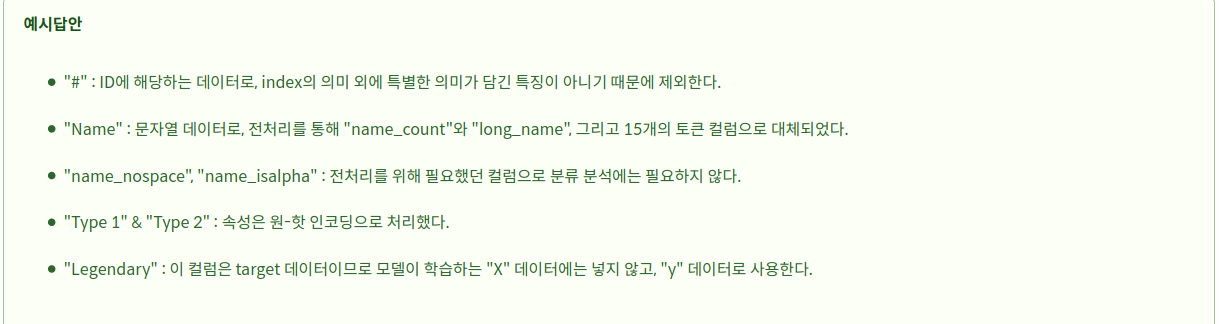

In [162]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [163]:
target = "Legendary"
target

'Legendary'

In [164]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [165]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [167]:
# x_train~y_test까지 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


## 13-19.가랏 몬스터볼_4 의사결정트리모델 다시 학습시키기

In [168]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [169]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [170]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



어떤가요? 위에서 약 0.62에 그쳤던 recall값이 무려 0.92로까지 올랐습니다!!

이는 실로 놀라운 발전이죠. 우리가 정리하고 처리했던 데이터만으로 이렇게 좋은 결과를 만들어낼 수 있었습니다.


    1. 포켓몬, 그 데이터는 어디서 구할까? 에서는 캐글 웹사이트에서 원하는 데이터를 가져와서 준비하는 것까지 해봤습니다.
    2. 전설의 포켓몬? 먼저 샅샅이 살펴보자! 에서는 전체 데이터셋을 밑바닥부터 꼼꼼히 탐색해봤죠.
    3. 전설의 포켓몬과 일반 포켓몬, 그 차이는? 에서는 우리가 원하는 target의 두드러지는 특징을 특히 자세하게 살펴보았습니다.
    4. 모델에 넣기 위해! 데이터 전처리하기 에서는 데이터를 머신러닝 모델에 넣기 적합한 형태로 전처리해주었습니다.
    5. 가랏, 몬스터볼! 에서는 베이스라인 모델을 학습시켜보고, 우리가 처리한 데이터로 성능을 올리는 것까지 해 보았습니다.
